<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

<h4 align='left'> Integrantes: </h4>
<p align='left'> Alfredo Silva Celpa 201373511-8 </p>
<p align='left'> Margarita Bugueño Pérez 201373510-k </p>
<hr style="height:2px;border:none"/>


**Temas**  
* Entrenamiento de redes *Feed-Forward* vı́a GD y variantes (SGD, mini-*batches*), *momentum*, regularización y tasa de aprendizaje adaptiva.
* Evaluación de redes *Feed-Forward* vı́a validación cruzada (cross-validation).
* Rol de capas ocultas y mayor profundidad (*Deep Learning*).
* Identificar el gradiente desvaneciente.
* Diseño y entrenamiento de Redes Convolucionales (CNNs).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 04 Abril
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF395-I-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Predicción del precio de una Casa  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Convolutional Neural Network (CNN) en CIFAR.  
[4.](#cuarto) Aplicación de una red neuronal en Localización

<a id="primero"></a>
## 1. Predicción del precio de una Casa

En esta sección trabajaremos con un pequeño dataset conocido como **Boston Housing** que nos permitirá experimentar de modo más completo y exhaustivo con las técnicas bajo estudio. El problema consiste en predecir el precio de una casa en una zona/barrio de Boston (*USA*) a partir de una serie de atributos que describen el lugar que éste se ubica: tasa de criminalidad, proporción de zona residencial, proporción de zona industrial, si se encuentra junto al rı́o ó no, contaminación atmosférica medida como la concentración de óxidos nı́tricos en el aire, entre otros. Para ver en detalle la descripción de la semántica asociada a los atributos de este problema, puede consultar   __[Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)__.

> a) Construya un *dataframe* con los datos a analizar descargando los datos desde la URL mantenida por los autores de *The Elements of Statistical Learning*. Convierta la variable *CHAS* a un vector binario de dos componentes indicando las 2 posibilidades de su valor, indique la conveniencia de este paso. Describa brevemente el dataset utilizar.
```python
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()
```
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = df_train.pop('MEDV').reshape(-1,1)
```



El dataset a utilizar, tal como se mencionó, corresponde a **Boston Housing**. Éste se tomó de la librería StatLib mantenida por la Universidad Carnegie Mellon.  
El dataset fue creado por Harrison D., Rubinfeld D.L. y J. Environ el **7 de julio de 1993**.


Información de los atributos descritos en __[Boston Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names)__.



    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000$
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's$

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
path='regression-datasets-housing.csv'
df = pd.read_csv(path, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
#CHAS, variable categorica
df = pd.get_dummies(df,columns=["CHAS"])
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.head()

/home/cony/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CRIM  ZN  INDUS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  \
0  0.00632  18   2.31  0.538  6.575  65.2  4.0900    1  296       15  396.90   
1  0.02731   0   7.07  0.469  6.421  78.9  4.9671    2  242       17  396.90   
2  0.02729   0   7.07  0.469  7.185  61.1  4.9671    2  242       17  392.83   
3  0.03237   0   2.18  0.458  6.998  45.8  6.0622    3  222       18  394.63   
4  0.06905   0   2.18  0.458  7.147  54.2  6.0622    3  222       18  396.90   

   LSTAT  MEDV  CHAS_0  CHAS_1  
0   4.98  24.0       1       0  
1   9.14  21.6       1       0  
2   4.03  34.7       1       0  
3   2.94  33.4       1       0  
4   5.33  36.2       1       0

In [2]:
print ("\nDimensiones del dataset:")
print (df.shape)
print ("\nDimensiones del dataframe de entrenamiento:")
print (df_train.shape)
print ("\nDimensiones del dataframe de pruebas:")
print (df_test.shape)
print ("\n\nInformación descritiva")
print (df.info())


Dimensiones del dataset:
(506, 15)

Dimensiones del dataframe de entrenamiento:
(379, 15)

Dimensiones del dataframe de pruebas:
(127, 15)


Información descritiva
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB
None


El dataset completo, esta compuesto de 506 registros, cada uno descrito por 15 atributos. Del total de registros, 379 se utilizarán para la fase de entrenamiento mientras que los 127 restantes se utilizarán como dataset de prueba (testing set).  
Cabe destacar que en la descripción se enuncian sólo 14 debido a que uno de ellos, 'CHAS', corresponde a una variable binaria que toma valor 1 cuando la propiedad se encuentra en las cercanías/límites del río Charles y valor 0 en caso contrario. En base a esto entonces, era necesario redefinir tal variable como dos columnas (una para los casos positivos y otra para los casos negativos) puesto para fines matemáticos, durante la manipulación de los datos, la expresión original podría traducirse hacia una connotación positiva o negativa de la presencia de tal característica, elevando o disminuyendo el valor de la casa.  
Con el nuevo atributo se impide este razonamiento puesto que siempre se contará con un 1 en el registro 'CHAS', ya sea en la columna correspondiente a 'CHAS_0'(cercanía al río) o 'CHAS_1'(lejos del río).

De manera similar, contamos con la descripción de cada uno de los atributos; El tipo de dato, precisión, uso de memoria total, etc. Así determinamos que 9 de los 15 atributos son del tipo flotante y los 6 restantes de tipo entero (4 y 2 de diferente precisión).

In [3]:
print ("\n\nEstadísticos de interés; dataframe completo")
print (df.describe())

print ("\n\nEstadísticos de interés; dataframe de entrenamiento")
print (df_train.describe())



Estadísticos de interés; dataframe completo
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.310593    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677082   12.000000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.083004  356.674

Igualmente, el método **.describe()** proporciona un resumen estadístico descriptivo que presenta tanto el valor medio, la dispersión, valores mínimos/máximos, así como la distribución de los datos diferida por cada atributo del dataframe.

Es posible notar entonces que ciertos atributos, como 'TAX' o 'B', presentan valores de dispersión muy altos. Así mismo, los valores medios de cada uno de los atributos varía considerablemente entre unos y otros debido al significado de cada uno. Es decir, es totalmente esperable (y natural) que la tasa de criminalidad se mueva en un dominio totalmente diferente al número de habitaciones promedio de una vivienda. Este fenómeno se aprecia tanto en el dataset completo como el conjunto de entrenamiento por lo que, nuevamente con el propósito de evitar el fenómeno de overfitting, es necesario reescalar los datos estandarizando las características, es decir, eliminando el promedio y escalando la varianza al valor unitario. Este trabajo lo hace **StandardScaler()**:

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = df_train.pop('MEDV').values.reshape(-1,1)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_test = df_test.pop('MEDV').values.reshape(-1,1)
X_train_scaled= X_train_scaled.drop(columns=['MEDV'])
X_test_scaled= X_test_scaled.drop(columns=['MEDV'])

In [5]:
X_train_scaled.head()

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0 -0.390600  0.427249 -0.744914 -1.078733 -1.021961  0.051970  1.994571   
1 -0.401276  0.553492 -0.849018 -0.889119 -0.556963 -0.764286  1.505651   
2 -0.401105  1.184706 -0.666480 -0.940832  1.378122 -0.700406  0.480493   
3  0.643120 -0.498531  1.000608  1.179393  0.228624  1.066967 -0.982823   
4  0.899863 -0.498531  1.000608  1.058730  0.677737  0.783052 -0.937990   

        RAD       TAX   PTRATIO         B     LSTAT    CHAS_0    CHAS_1  
0 -0.278328 -0.427994  0.380272  0.340496  0.822121  0.265747 -0.265747  
1 -0.162916 -0.696853  0.380272  0.427749 -0.462417  0.265747 -0.265747  
2 -0.624563 -0.872196 -0.487939  0.341844 -0.903108 -3.762978  3.762978  
3  1.683670  1.535846  0.814377  0.372500  0.635835  0.265747 -0.265747  
4  1.683670  1.535846  0.814377 -3.786994  1.841132  0.265747 -0.265747

In [6]:
print (X_train_scaled.describe())

               CRIM            ZN         INDUS           NOX            RM  \
count  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02   
mean   5.111713e-17  3.251577e-17  7.909241e-17  7.245743e-16 -7.844795e-16   
std    1.001322e+00  1.001322e+00  1.001322e+00  1.001322e+00  1.001322e+00   
min   -4.130329e-01 -4.985312e-01 -1.514998e+00 -1.475198e+00 -3.973687e+00   
25%   -4.046811e-01 -4.985312e-01 -8.618530e-01 -9.235945e-01 -5.894549e-01   
50%   -3.818337e-01 -4.985312e-01 -3.598727e-01 -1.565211e-01 -1.208466e-01   
75%   -1.827370e-03  3.430872e-01  1.000608e+00  6.450276e-01  5.246631e-01   
max    1.037470e+01  3.709561e+00  2.375350e+00  2.713540e+00  3.563035e+00   

                AGE           DIS           RAD           TAX       PTRATIO  \
count  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02   
mean   2.097413e-16 -2.073979e-16  1.274267e-16  1.057495e-16 -5.680006e-16   
std    1.001322e+00  1.001322e+00  1.001322e+00  1.

Text(0.5,1,'NOX escalado')

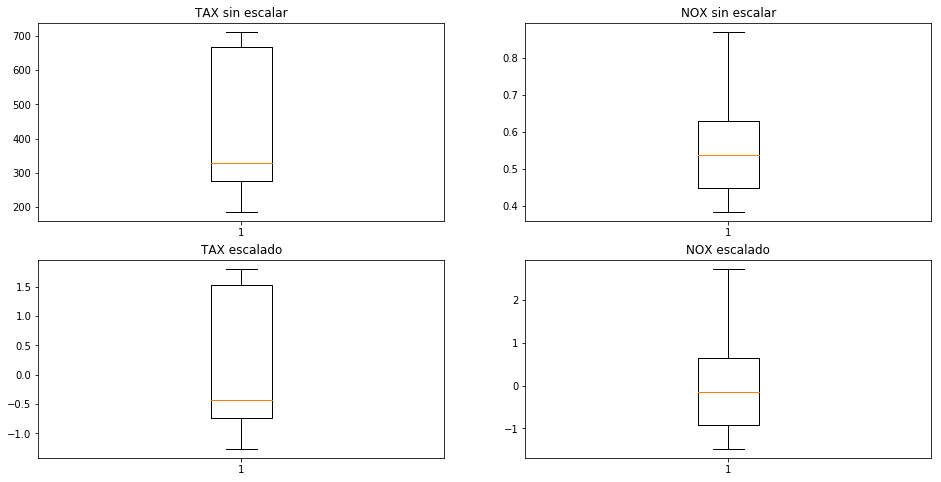

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
A,B=plt.subplots(2,2,figsize=(16,8))
B[0,0].boxplot(df_train['TAX'])
B[0,0].set_title("TAX sin escalar")
B[0,1].boxplot(df_train['NOX'])
B[0,1].set_title("NOX sin escalar")
B[1,0].boxplot(X_train_scaled['TAX'])
B[1,0].set_title("TAX escalado")
B[1,1].boxplot(X_train_scaled['NOX'])
B[1,1].set_title("NOX escalado")

Los boxplots presentados ayudan igualmente al entendimiento del fenómeno; Antes de escalar los datos variaban en rangos amplios y disparejos entre las diferentes características del dataframe mientras que, una vez escalados, todos los atributos se mueven en torno al cero. Así entonces, es notorio que las varianzas son unitarias y que el valor promedio es cero (e-16 app.) por lo que no hay que preocuparse de la diferencia de magnitudes entre variables.

#### b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento. 
#### Esto para una red *feedforward* de 3 capas, con 200 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de entrenamiento, en el conjunto de entrenamiento y de pruebas.   
#### Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.


In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))

/home/cony/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 105.4132 - val_loss: 56.3503
Epoch 2/300
379/379 [==============================] - 0s 55us/step - loss: 45.8415 - val_loss: 49.1755
Epoch 3/300
379/379 [==============================] - 0s 50us/step - loss: 34.9456 - val_loss: 45.5030
Epoch 4/300
379/379 [==============================] - 0s 50us/step - loss: 30.3990 - val_loss: 44.2195
Epoch 5/300
379/379 [==============================] - 0s 45us/step - loss: 30.2899 - val_loss: 42.2464
Epoch 6/300
379/379 [==============================] - 0s 37us/step - loss: 26.0479 - val_loss: 40.6155
Epoch 7/300
379/379 [==============================] - 0s 50us/step - loss: 24.6118 - val_loss: 38.3923
Epoch 8/300
379/379 [==============================] - 0s 57us/step - loss: 24.6833 - val_loss: 36.2442
Epoch 9/300
379/379 [==============================] - 0s 44us/step - loss: 23.5295 - val_loss: 39.2636
Epoch 10/300
379/3

379/379 [==============================] - 0s 44us/step - loss: 12.7985 - val_loss: 24.4149
Epoch 156/300
379/379 [==============================] - 0s 42us/step - loss: 12.6657 - val_loss: 25.3795
Epoch 157/300
379/379 [==============================] - 0s 43us/step - loss: 12.4120 - val_loss: 22.6836
Epoch 158/300
379/379 [==============================] - 0s 43us/step - loss: 12.6931 - val_loss: 24.7564
Epoch 159/300
379/379 [==============================] - 0s 43us/step - loss: 12.6473 - val_loss: 23.7157
Epoch 160/300
379/379 [==============================] - 0s 42us/step - loss: 12.2132 - val_loss: 22.3740
Epoch 161/300
379/379 [==============================] - 0s 52us/step - loss: 12.4143 - val_loss: 23.5924
Epoch 162/300
379/379 [==============================] - 0s 51us/step - loss: 12.0259 - val_loss: 23.4565
Epoch 163/300
379/379 [==============================] - 0s 47us/step - loss: 12.0471 - val_loss: 22.6292
Epoch 164/300
379/379 [==============================] - 0s 

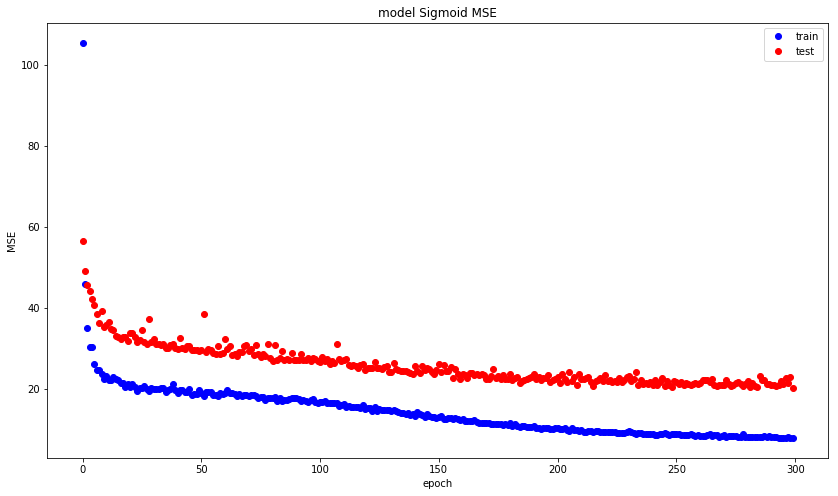

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'], 'bo')
plt.plot(history.history['val_loss'],'ro')
plt.title('model Sigmoid MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
#plt.ylim(0,40)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

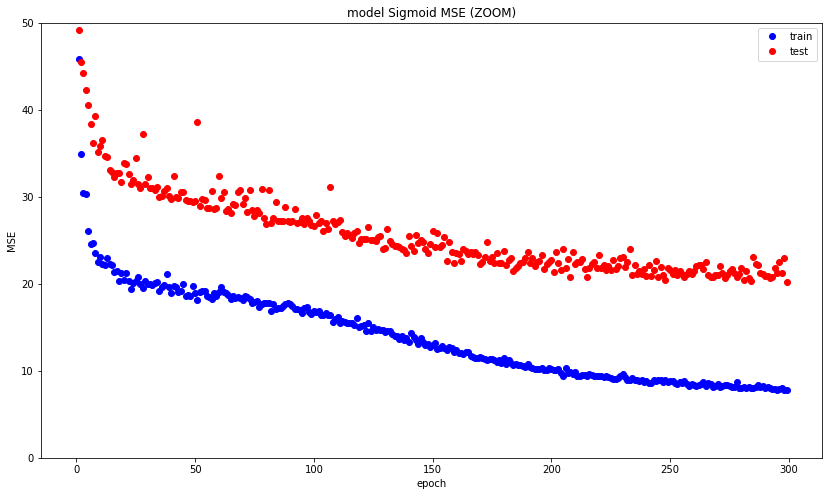

In [10]:
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'], 'bo')
plt.plot(history.history['val_loss'],'ro')
plt.title('model Sigmoid MSE (ZOOM)')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.ylim(0,50)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

En este gráfico se aprecia un rápido decaimiento de la tasa de error, tanto en el conjunto de entrenamiento como el de validación. Es más, dentro de los primeros 20 epochs el aprendizaje de la red es notable, desde aquí hasta el epoch número 40 se aprecia que este decaimiento es menos pronunciado pero aún así refleja un claro aprendizaje por parte de la red, mientras que desde el epoch 40avo en adelante, la disminucion del error es casi nulo (despreciable). Por esto, es que se puede afirmar que el modelo se encuentra en un óptimo local desde el cual no es capaz de salir (dado que el error no se mueve de los valores 0.08-0.09).  Igualmente, es posible apreciar una cierta varianza en los valores que toma la Loss y que, posiblemente, se deban a la taza de aprendizaje empleada, en cuanto a la convergencia del algoritmo, los errores presentan una pequeña varianza que hace que el algoritmo tenga una convergencia más lenta de lo que se podria esperar. Esto es evidente al analizar el efecto alternante de los valores de Loss respecto a la tendencia de éstos (línea graficada).

#### c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).  


In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 220us/step - loss: 250.4103 - val_loss: 48.3519
Epoch 2/300
379/379 [==============================] - 0s 41us/step - loss: 24.7989 - val_loss: 33.1200
Epoch 3/300
379/379 [==============================] - 0s 39us/step - loss: 20.1189 - val_loss: 29.8270
Epoch 4/300
379/379 [==============================] - 0s 47us/step - loss: 15.2191 - val_loss: 25.8534
Epoch 5/300
379/379 [==============================] - 0s 46us/step - loss: 15.7183 - val_loss: 25.6462
Epoch 6/300
379/379 [==============================] - 0s 45us/step - loss: 13.2913 - val_loss: 27.0629
Epoch 7/300
379/379 [==============================] - 0s 43us/step - loss: 12.5352 - val_loss: 31.1953
Epoch 8/300
379/379 [==============================] - 0s 49us/step - loss: 12.2129 - val_loss: 24.0045
Epoch 9/300
379/379 [==============================] - 0s 47us/step - loss: 12.1046 - val_loss: 21.7962
Epoch 10/300
379

379/379 [==============================] - 0s 48us/step - loss: 4.2597 - val_loss: 16.6324
Epoch 158/300
379/379 [==============================] - 0s 46us/step - loss: 4.1263 - val_loss: 18.1278
Epoch 159/300
379/379 [==============================] - 0s 45us/step - loss: 4.0467 - val_loss: 16.9380
Epoch 160/300
379/379 [==============================] - 0s 41us/step - loss: 4.0473 - val_loss: 17.2369
Epoch 161/300
379/379 [==============================] - 0s 50us/step - loss: 4.4707 - val_loss: 16.9775
Epoch 162/300
379/379 [==============================] - 0s 40us/step - loss: 4.0595 - val_loss: 18.1863
Epoch 163/300
379/379 [==============================] - 0s 45us/step - loss: 4.5544 - val_loss: 18.6214
Epoch 164/300
379/379 [==============================] - 0s 41us/step - loss: 4.6385 - val_loss: 17.7409
Epoch 165/300
379/379 [==============================] - 0s 43us/step - loss: 4.2644 - val_loss: 17.5490
Epoch 166/300
379/379 [==============================] - 0s 45us/step

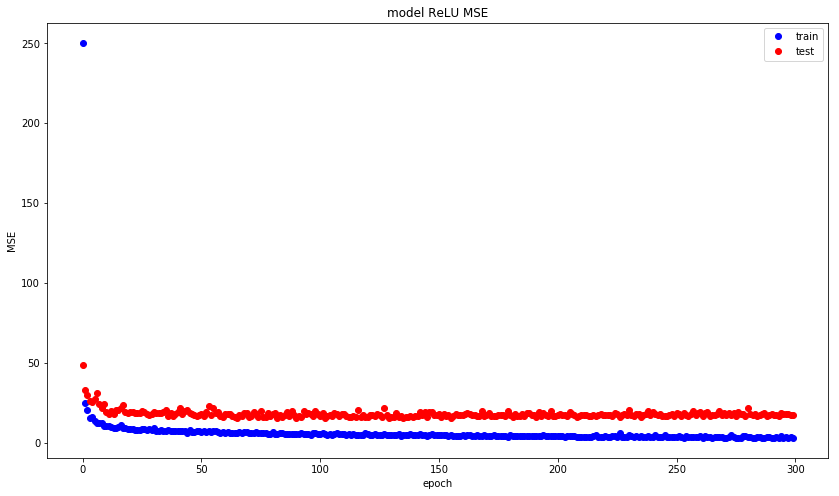

In [12]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'ro')
plt.title('model ReLU MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
#plt.ylim(0,40)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

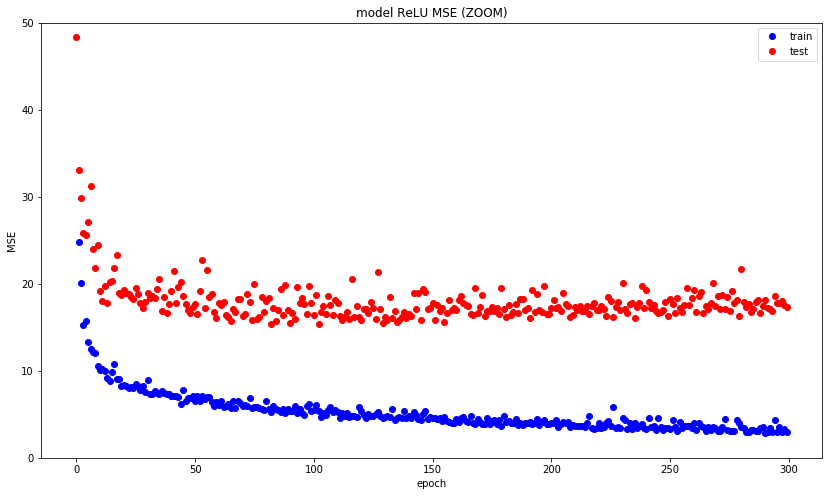

In [13]:
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'ro')
plt.title('model ReLU MSE (ZOOM)')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.ylim(0,50)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

En este gráfico se aprecia el decaimiento mucho más claro y pronunciado que utilizando una función de activación Sigmoidal. Tanto errores de entrenamiento como de validacion corresponden a valores bastante pequeños. Así entonces, dentro de los primeros 5 epochs el aprendizaje de la red es notable pues decae considerablemente el nivel de Loss. Desde el epoch 5 hasta el 20 aproximadamente, la red continúa aprendiendo pero de manera más lenta, mientras que desde aquí hasta el epoch 50 los valores de Loss fluctúan levemente entre 0.4 y 0.1 para llegar finalmente a los valores de 0.01-0.3 en los restantes. Cabe destacar que este proceso, para el caso de Sigmoid, se lleva a cabo de manera más suave a través de los epochs.  


Finalmente, se está en condiciones de aceptar a la función de activación ReLu como la adecuada; Considerando además la linealidad en el rango de valores positivos, tal como expone el problema de regresión planteado, por lo que resulta natural llegar a dicha conclusión.



#### d)Repita b) y c) variando la tasa de aprendizaje (learning rate) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.



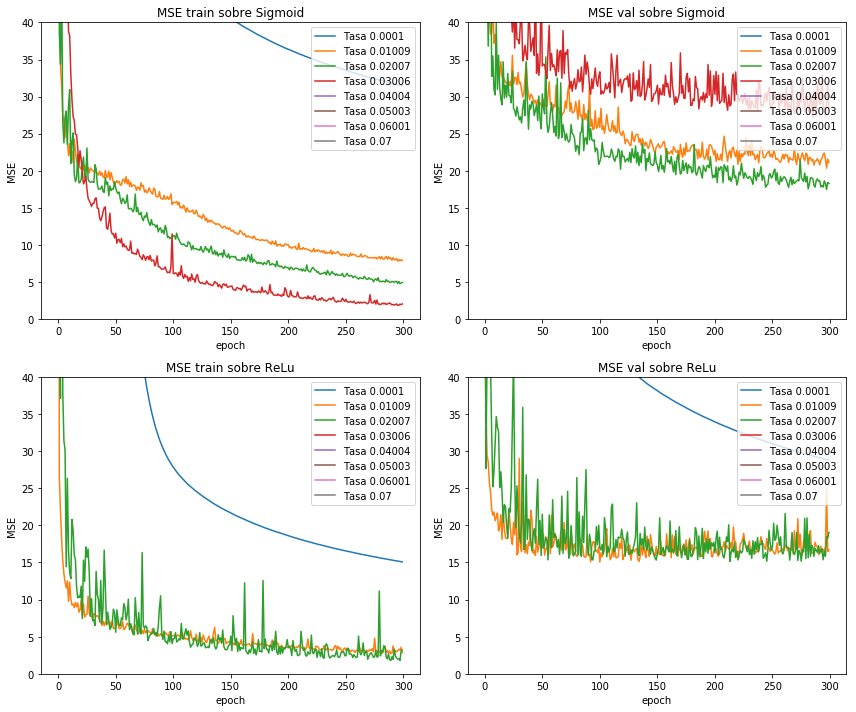

In [14]:
import numpy as np
n_lr = 8
lear_rate = np.linspace(0.0001,0.07,n_lr)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0
for a in activacion:      
    for r in lear_rate:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa '+str(np.round(r,5)))
        B[i,1].plot(val_loss,label='Tasa '+str(np.round(r,5)))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,40)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(0,40)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,40)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(0,40)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()
        

Con el fin de trabajar en un rango de tasas de aprendizaje válidas, para efectos de los modelos a entrenar, se estableció arbitrariamente que éstas debían pertenecer aproximadamente al rango 0.0001-0.07. Así entonces, se obtuvo que, para ciertas tasas de aprendizaje (aquellas de valores 'altos'), reflejaban someterse a un fenómeno de divergencia.  
Por esto, en los gráficos presentados, es apreciable la gran influencia del parámetro 'learning rate' cuando se utiliza un optimizador basado en gradientes. De este modo, cuando ésta es toma valores muy bajos, el nivel de convergencia hacia un óptimo local es bastante lento dado que el reajuste de hiperparámetros se realiza con valores de actualización muy bajos. Al contrario, cuando esta tasa de aprendizaje toma valores más altos, la convergencia empieza a acelerarse. Sin embargo, si esta sobrepasa el valor óptimo (y se hace muy grande), se producirá un efecto negativo en el entrenamiento de la red puesto que no se logrará llegar al óptimo debido a que se caerá en una divergencia, alejándose del punto objetivo.  

Este efecto de divergencia se refleja en los valores infinitos que toma la Loss (al estar alejándose del óptimo). Si bien estos valores no se explicitan, los gráficos sí lo hacen puesto que, aquellos valores demasiado altos se interpretan, para efectos de cálculo, como infinitos, los cuales son imposible de representar visualmente y que, claro, se traducen a los valores NaN obtenidos por el modelo entrenado. Un ejemplo burdo de lo indicado es: 



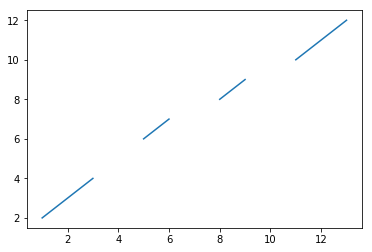

In [15]:
plt.plot([np.nan,2,3,4,np.nan, 6,7,np.inf,8,9, np.nan,10,11,12])


A continuación, de manera más clara, se presentan los casos de divergencia apreciados tanto para la función de activación Sigmoidal como ReLu. 

##### Divergencia Sigmoid

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 706us/step - loss: 42003941329.8283 - val_loss: 417865251960.9449
Epoch 2/300
379/379 [==============================] - 0s 43us/step - loss: 109402095241805.0000 - val_loss: 1701104719829556.5000
Epoch 3/300
379/379 [==============================] - 0s 48us/step - loss: 2411567688708097536.0000 - val_loss: 38937620550749306880.0000
Epoch 4/300
379/379 [==============================] - 0s 49us/step - loss: 36430751114647327211520.0000 - val_loss: 680687440747763142230016.0000
Epoch 5/300
379/379 [==============================] - 0s 54us/step - loss: 1142083975612347377688510464.0000 - val_loss: 22475720521837042502115262464.0000
Epoch 6/300
379/379 [==============================] - 0s 50us/step - loss: 37610806929205643151566136410112.0000 - val_loss: 666424292878129623989894311313408.0000
Epoch 7/300
379/379 [==============================] - 0s 55us/step - loss: inf - val_loss:

Epoch 82/300
379/379 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 83/300
379/379 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 84/300
379/379 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 85/300
379/379 [==============================] - 0s 44us/step - loss: nan - val_loss: nan
Epoch 86/300
379/379 [==============================] - 0s 45us/step - loss: nan - val_loss: nan
Epoch 87/300
379/379 [==============================] - 0s 60us/step - loss: nan - val_loss: nan
Epoch 88/300
379/379 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 89/300
379/379 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 90/300
379/379 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 91/300
379/379 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 92/300
379/379 [========

Epoch 166/300
379/379 [==============================] - 0s 43us/step - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s 41us/step - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s 41us/step - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s 41us/step - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s 43us/step - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s 41us/step - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s 42us/step - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s 44us/step - loss: nan - val_loss: nan
Epoch 176/300
379/37

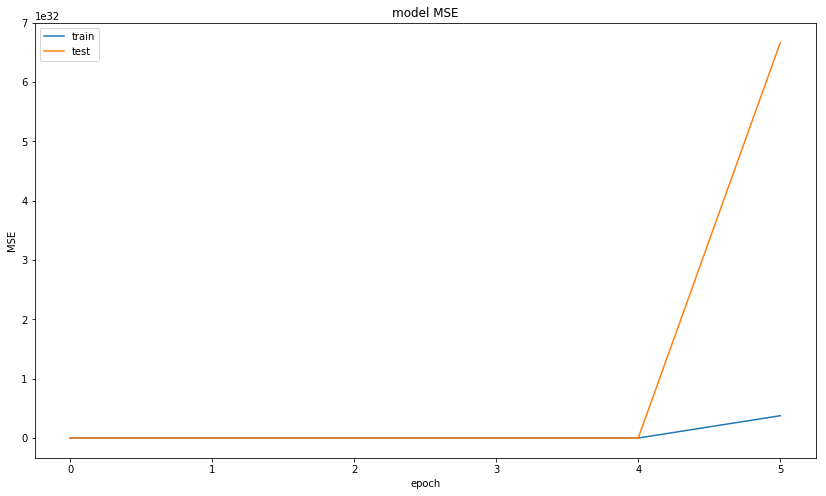

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.032),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))


plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Divergencia ReLU

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 863us/step - loss: 408.7735 - val_loss: 48.5241
Epoch 2/300
379/379 [==============================] - 0s 43us/step - loss: 38.8395 - val_loss: 56.2630
Epoch 3/300
379/379 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s 44us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 49us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 41us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 51us/step - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s 52us/step - l

Epoch 85/300
379/379 [==============================] - 0s 49us/step - loss: nan - val_loss: nan
Epoch 86/300
379/379 [==============================] - 0s 50us/step - loss: nan - val_loss: nan
Epoch 87/300
379/379 [==============================] - 0s 45us/step - loss: nan - val_loss: nan
Epoch 88/300
379/379 [==============================] - 0s 42us/step - loss: nan - val_loss: nan
Epoch 89/300
379/379 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 90/300
379/379 [==============================] - 0s 43us/step - loss: nan - val_loss: nan
Epoch 91/300
379/379 [==============================] - 0s 44us/step - loss: nan - val_loss: nan
Epoch 92/300
379/379 [==============================] - 0s 45us/step - loss: nan - val_loss: nan
Epoch 93/300
379/379 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s 51us/step - loss: nan - val_loss: nan
Epoch 95/300
379/379 [========

379/379 [==============================] - 0s 63us/step - loss: nan - val_loss: nan
Epoch 252/300
379/379 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 253/300
379/379 [==============================] - 0s 51us/step - loss: nan - val_loss: nan
Epoch 254/300
379/379 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 255/300
379/379 [==============================] - 0s 45us/step - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s 41us/step - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s 56us/step - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s 58us/step - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s 53us/step - loss: nan - val_loss: nan
Epoch 261/300
379/379 [===========

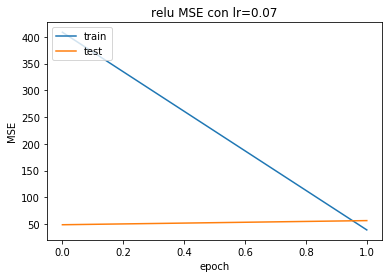

In [20]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=(SGD(lr=0.019)),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
                    verbose=1, validation_data=(X_test_scaled, y_test))

loss = history.history['loss'].copy()
val_loss = history.history['val_loss'].copy()
plt.figure(figsize=(6,4))
plt.plot(loss)
plt.plot(val_loss)
plt.title(a+' MSE con lr='+str(r))
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Así entonces, la red entrenada con función Sigmoidal, permite convergencia hacia un óptimo local cuando la tasa de aprendizaje no supera el 0.03. Por sobre este valor, se aprecia el fenómeno de divergencia de la red. Es decir, en lugar de acercarse y ajustar los parámetros para alcanzar un óptimo, la alta tasa de aprendizaje produce un cambio en los hiperparámetros que produce un salto que aleja al algoritmo de los óptimos traduciéndose en erorres mucho mayores que los ya alcanzados, tal como ya se comentó. Así, no se permite el reajustaste en la dirección correcta. 

A continuación se presenta el entrenamiento, y sus valores de error, para las configuraciones de función de activacion Sigmoidal y ReLU en base a diferentes tasa de aprendizaje. Tasas que han sido reajustadas a fin de no diverger

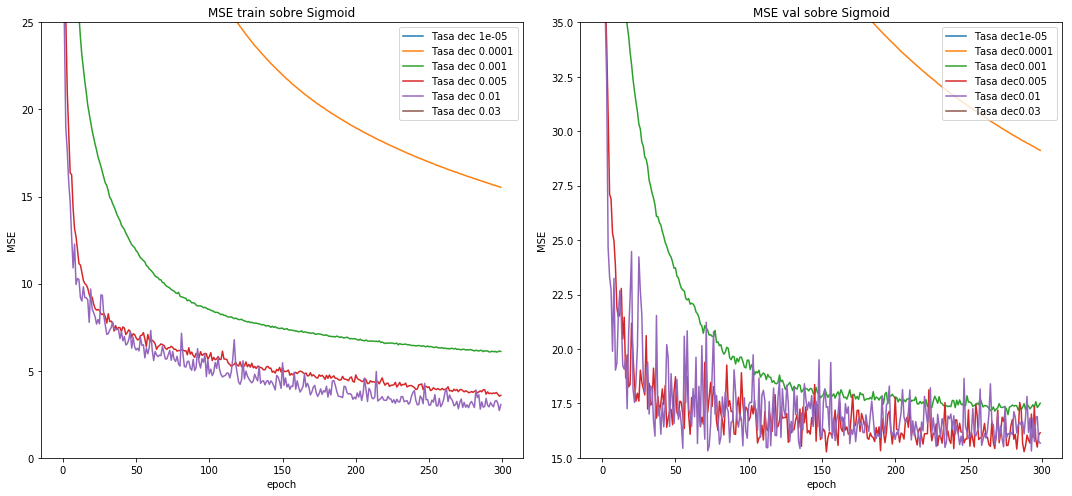

In [25]:
import numpy as np
n_lr = 8
#lear_rate_sig = np.linspace(0.0001,0.03,n_lr)
lear_rate_sig = [0.00001,0.0001,0.001,0.005,0.01,0.03]
activacion="sigmoid" 
loss_val=[]
A,B=plt.subplots(1,2,figsize=(15,7))
for r in lear_rate_sig:
    itera=[]
    model = Sequential() 
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=300,
                        verbose=0, validation_data=(X_test_scaled, y_test))

    loss = history.history['loss'].copy()
    val_loss = history.history['val_loss'].copy()
    B[0].plot(loss,label='Tasa dec '+str(np.round(r,5)))
    B[1].plot(val_loss,label='Tasa dec'+str(np.round(r,5)))
B[0].legend(loc='upper right')
B[0].set_title('MSE train sobre Sigmoid')
B[0].set_ylim(0,25)
B[0].set_ylabel('MSE')
B[0].set_xlabel('epoch')

B[1].legend(loc='upper right')
B[1].set_title('MSE val sobre Sigmoid')
B[1].set_ylim(15,35)
B[1].set_ylabel('MSE')
B[1].set_xlabel('epoch')

A.tight_layout()
plt.show()
        


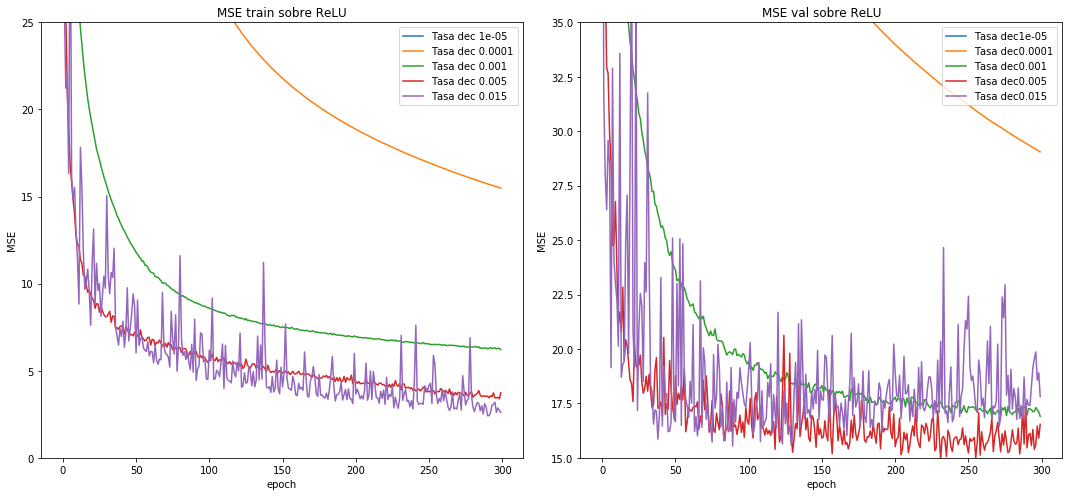

In [26]:
n_lr = 8
#lear_rate_relu = np.linspace(0.0001,0.025,n_lr)
lear_rate_relu = [0.00001,0.0001,0.001,0.005,0.015]
activacion="relu"
loss_val2=[]
A,B=plt.subplots(1,2,figsize=(15,7))
for r in lear_rate_relu:
    itera2=[]
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=300,
                        verbose=0, validation_data=(X_test_scaled, y_test))

    loss = history.history['loss'].copy()
    val_loss = history.history['val_loss'].copy()
    B[0].plot(loss,label='Tasa dec '+str(np.round(r,5)))
    B[1].plot(val_loss,label='Tasa dec'+str(np.round(r,5)))
B[0].legend(loc='upper right')
B[0].set_title('MSE train sobre ReLU')
B[0].set_ylim(0,25)
B[0].set_ylabel('MSE')
B[0].set_xlabel('epoch')

B[1].legend(loc='upper right')
B[1].set_title('MSE val sobre ReLU')
B[1].set_ylim(15,35)
B[1].set_ylabel('MSE')
B[1].set_xlabel('epoch')

A.tight_layout()
plt.show()
        


Así entonces, es posible apreciar el efecto en el proceso de aprendizaje para cada una de las tasas de aprendizaje establecidas. Tal como se enunció anteriormente, se observa que para aquellas tasas de aprendizaje demasiado bajas, el algoritmo tarda bastante en converger hacia el óptimo explorando el espacio de búsqueda de manera muy lenta. Es decir, las actualizaciones de los pesos (en la dirección del gradiente) se lleva a cabo de manera muy suave.  
Lo contrario se puede observar para valores de tasas más altos, puesto que se magnifica la importancia del gradiente a fin de realizar una actualización con considerable en los parámetros del modelo. Por ejemplo para el valor 0.015 la configuración presenta Overshoting, es decir, el learning rate es tan alto, que al modelo le cuesta converger a un solo punto y se presentan aquellos saltos en la función graficada.

Una vez más estamos en condición de aceptar a ReLU como función de buen comportamiento puesto que, basta con una pequeña tasa de aprendizaje (o valores medios ~0.005) para que el modelo logre converger hacia los puntos óptimos del espacio de trabajo, tal como se logra apreciar en los gráficos ya presentados. 

**Cabe destacar que la ausencia de aquellas lineas de tendencia no apreciables en los gráficos, se debe a que obtuvieron valores de Loss lo suficientemente alto como para no reflejarse en las imágenes (dado que éstan están limitadas al rango de 0-20 a fin de comparar resultados)**

#### e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.



Valores de tasas de decaimiento a aplicar:  [0.0005, 0.005, 0.01, 0.08, 0.2]


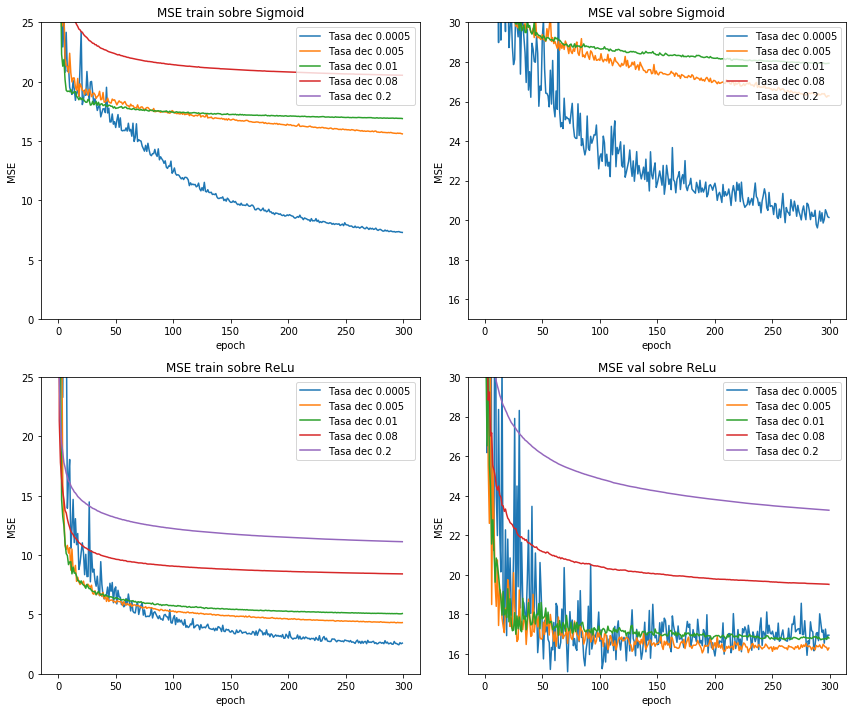

In [28]:
n_decay = 7
#lear_decay = np.logspace(-6,-1,n_decay)
lear_decay=[0.0005,0.005,0.01,0.08,0.2]
print ("Valores de tasas de decaimiento a aplicar: ",lear_decay)
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0
for a in activacion:  
    for r in lear_decay:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        #modificar la tasa del sgd learning rate
        model.compile(optimizer=(SGD(lr=0.02,decay=r)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa dec '+str(np.round(r,6)))
        B[i,1].plot(val_loss,label='Tasa dec '+str(np.round(r,6)))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,25)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(15,30)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,25)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(15,30)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()
        


Progressive Decay tiene como objetivo la disminución de la tasa de aprendizaje progresiva a fin de establecer su valor óptimo. Así, con una tasa de entrenamiento fija inicial de 0.02, se observa que la aplicación de éste permite ajustar el aprendizaje del modelo de modo tal que, para aquellos valores muy pequeños (líneas azul y naranja), el ajuste no logra ser considerable, no teniendo efecto alguno en el comportamiento de un modelo sin **progressive decay**. Es decir, la disminución es muy pequeña y los buenos resultados resultan ser los originales en un modelo con tasa de aprendizaje 0.02. Contrario a lo que ocurre con valores más significativos (línea lila y roja) en los que se aprecia que la Loss se estabiliza en valores más altos cayendo en una mayor Loss. Esto se debe a que, si se regulariza demasiado el parámetro de learning rate, se caerá en un reajuste demasiado alto de los parámetros del modelo (pesos) de manera tal que se produce el efecto contrario al esperado no permitiendo un aprendizaje significativo del modelo.


Ahora bien, nuevamente podemos afirmar nuestras teorías sobre el comportamiento y ventajas de la función de activación ReLU, dado que para diferentes valores de 'progressive decay', altos o bajos, la convergencia del modelo hacia los óptimos es clara. No así con Sigmoid, puesto que ésta resulta bastante sensible a las modificaciones del parámetro (la tendencia de la Loss varía mucho entre una configuración y otra).




#### f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente.
```python
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled.as_matrix(),y_train.as_matrix(),batch_size=50,epochs=300)
```


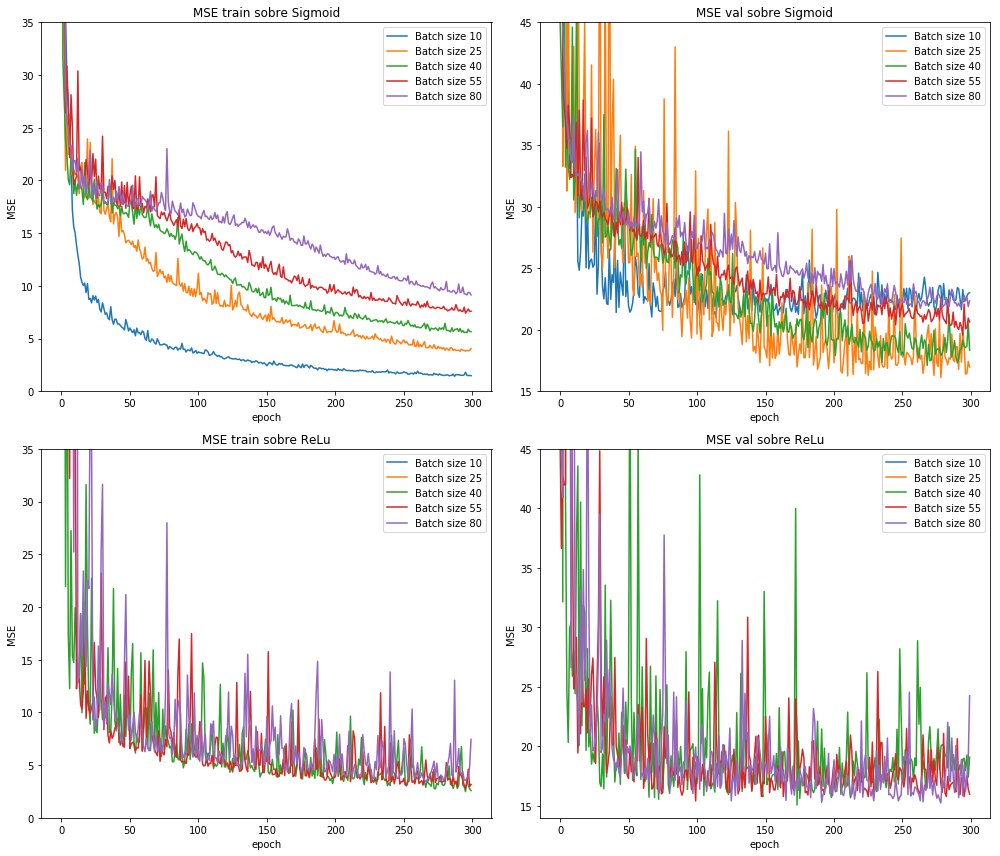

In [33]:
n_batches = 7
#batch_sizes = np.linspace(25,200,n_batches,dtype=np.int)
#print (batch_sizes)
batch_sizes= [10,25,40,55,80]
A,B=plt.subplots(2,2,figsize=(14,12))
i=0
activacion=["sigmoid","relu"]
for a in activacion:  
    for r in batch_sizes:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        #modificar la tasa del sgd learning rate
        model.compile(optimizer=(SGD(lr=0.02)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, batch_size=r,validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Batch size '+str(r))
        B[i,1].plot(val_loss,label='Batch size '+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,35)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(15,45)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,35)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(14,45)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

Los resultados mostrados indican la aplicacion de los modelos bajo una tasa de aprendizaje de 0.02 en toda ejecución; Esto a fin de comparar el comportamiento en diferentes configuraciones de tamaños de batch.  
Así entonces, resulta evidente que, para aquellos tamaños de batch más pequeños (10 y 20), se obtienen valores de Loss bajos para la configuración bajo función de activacón Sigmoidal, mientras que, para ReLU, la loss sigue encontrandose en valores aceptables indepedientemente del tamaño de batch que se aplique.  
Algo un tanto diferente se aprecia para el batch de tamaño 30, el cual acusa ser bastante efectivo tanto para Sigmoid como para ReLu permitiendo alcanzar valores de Loss muy pequeños tanto en el proceso de entrenamiento como en el de pruebas.  
Sin embargo, cuando el batch tomó tamaños más significativos, se cayó en valores de Loss mucho más altos; Para sigmoidal la Loss se estableció en 20, mientras que para ReLu, la Loss se estableció de manera muy parecida independientemente del batch, aun asi los comportamientos mejoraron de manera marginal mientras más pequeño fuera el batch. 

Este fenómeno se puede explicar desde el punto de vista de la optimización. Es decir, dado que el modelo manipula muy pocos ejemplos de entrenamiento (cuando el batch es pequeño), se cae en un modelo extremadamente simple, entorpeciendo el ajuste de parámetros del modelo. Ahora bien, cuando el tamaño del batch tomaba valores medios (30-40) sí se contaba con una cantidad de parámetros significativa pero que mantenian la simplicidad del modelo. Sin embargo, cuando el tamaño comenzaba a ser mayor, se caía en un modelo de numerosos parámetros (modelo mucho más complejo y que generalmente caerá en overfitting), este fenómeno no se aprecia en ReLU, ya que al ocuparla se introduce esparcidad en el modelo, lo que se puede interpretar como una simplificación en la complejidad de este mismo.  

Ahora bien, dado que el batch está compuesto por pocos de ejemplos, se deberá caer en un número mucho mayor de iteraciones que con un batch más grande. Sin embargo, tal como se enuncia, el proceso de optimización y ajustes es mucho más sencillo en un número de parámetros reducidos con muchas iteraciones que cuando se tienen pocas iteraciones con numerosos parámetros a reajustar.  

Así entonces es posible mencionar que existe un trade-off entre el tamaño del batch y el desempeño del modelo (Loss).

#### g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de pruebas?
```python
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer)
model.fit(X_train_scaled.as_matrix(),y_train.as_matrix())
```


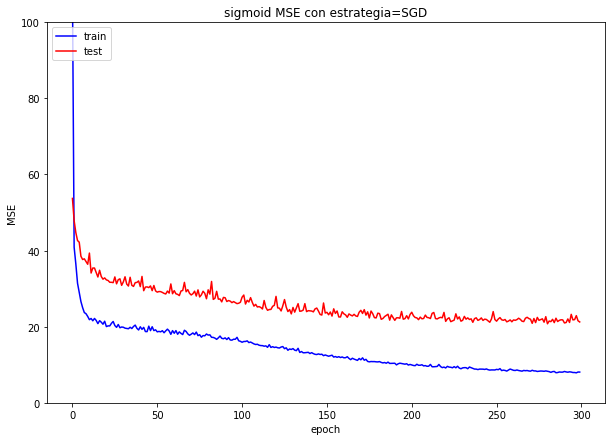

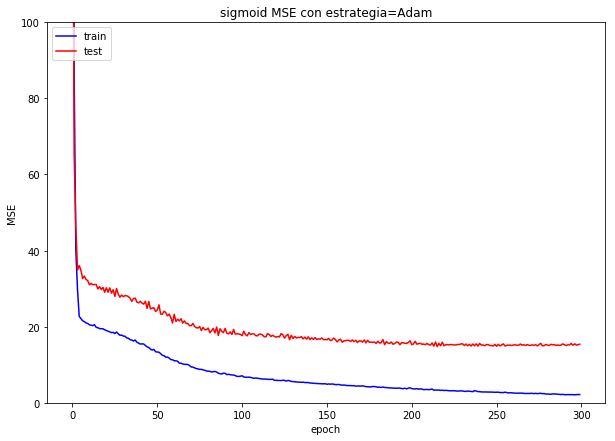

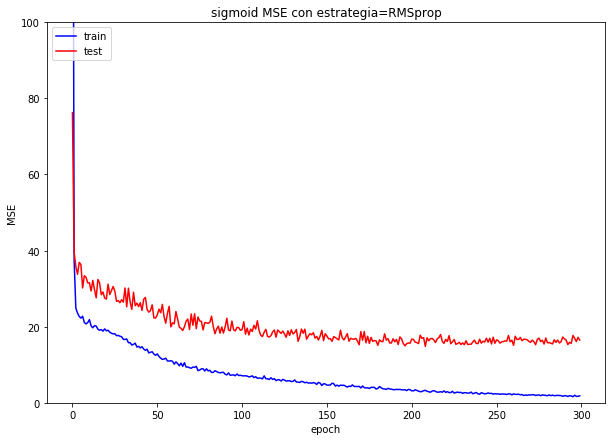

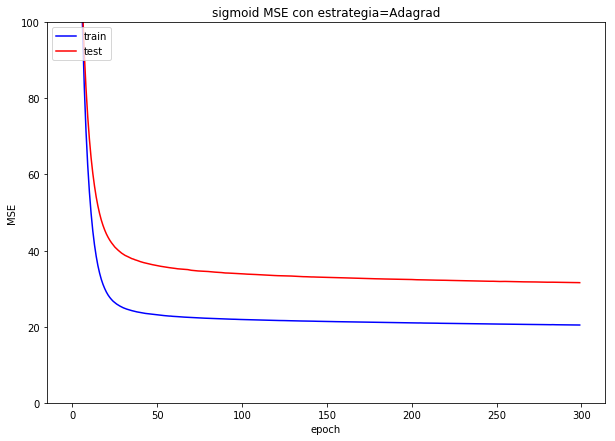

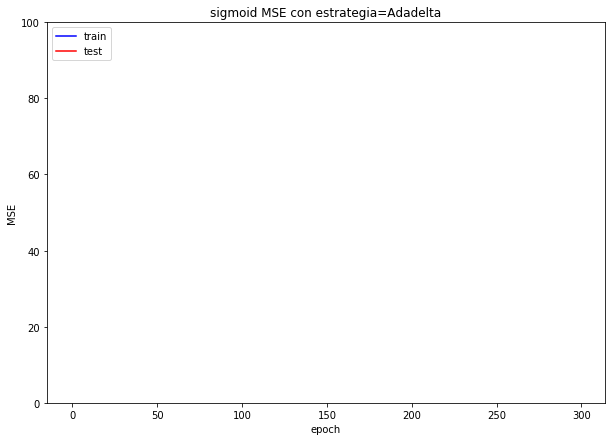

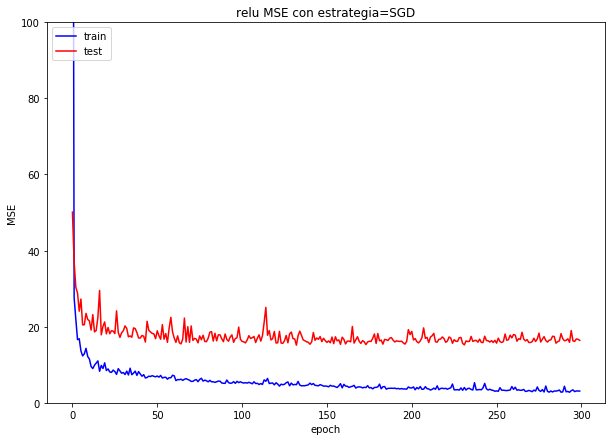

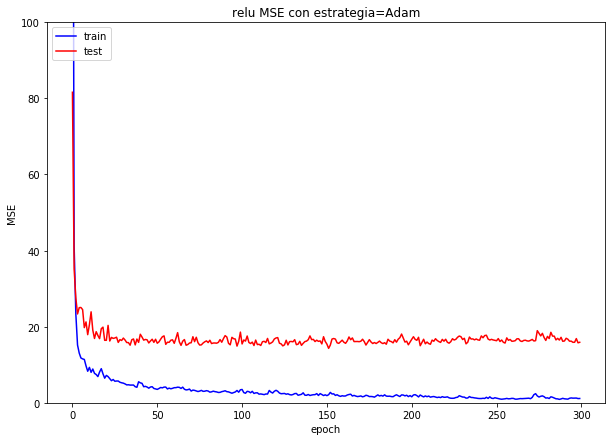

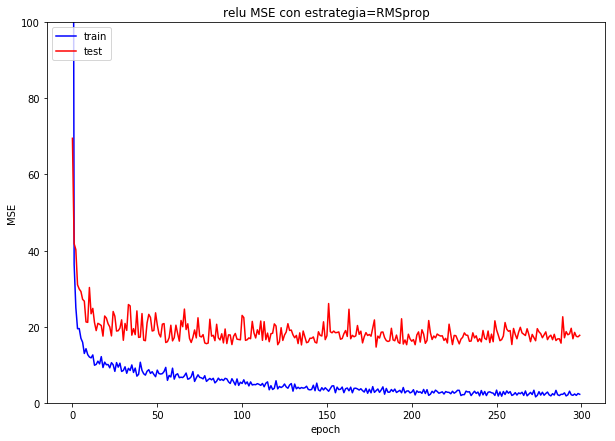

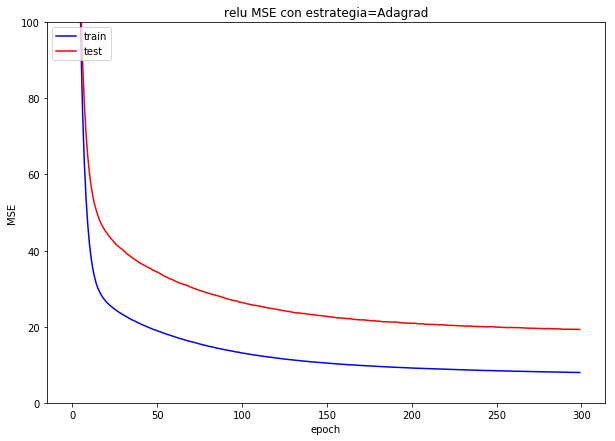

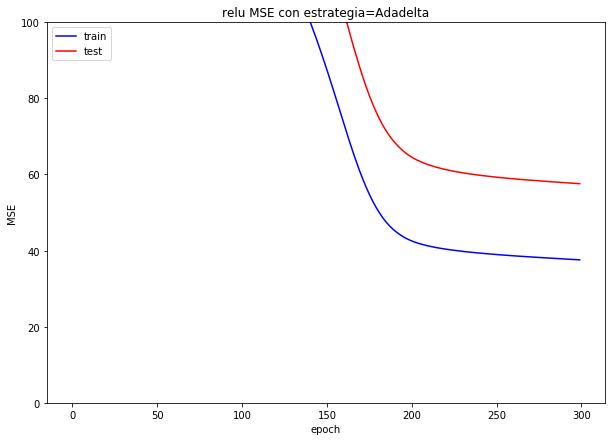

In [34]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import matplotlib.pyplot as plt
%matplotlib inline

estrategias={}
estrategias['SGD']=SGD(lr=0.01)
estrategias['Adam']=Adam(lr=0.01)
estrategias['RMSprop']=RMSprop(lr=0.01)
estrategias['Adagrad']=Adagrad(lr=0.01)
estrategias['Adadelta']=Adadelta(lr=0.01)
activacion=["sigmoid","relu"]

for a in activacion:  
    for estrat in estrategias.keys():
        plt.figure(figsize=(10,7))
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=(estrategias[estrat]),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        plt.plot(loss,'b-')
        plt.plot(val_loss,'r-')
        plt.title(a+' MSE con estrategia='+str(estrat))
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.ylim(0,100)
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()




Los resultados mostrados indican la aplicacion de los modelos bajo una tasa de aprendizaje de 0.01 para toda ejecución; Esto a fin de comparar el comportamiento en diferentes optimizadores modernos.  

Así se aprecia que el algortimo de AdaDaleta es el peor de los optimizadores aplicados, a una tasa de aprendizaje fija de 0.01, observándose que su convergencia hacia los óptimos es considerablemente lenta. Por ello, en el epoch 300, acusa los valores de Loss más altos del conjunto del optimizadores comparados.  
Respecto a RMSprop, podemos notar que, a tasa de aprendizaje fija en 0.01, parece alternar en torno a la tendencia principal de la Loss. Esto es, fluctúa con erorres (mayores y menores) respecto al comportamiento medio. Así entonces, RMSprop corresponde al optimizador de mayor varianza e incertidumbre.  
Ahora, si bien SGD demostró lograr buenos resultados, resulta evidente que no es aquel de mejor comportamiento. Esto se debe a que las técnicas aquí comparadas son mucho más modernas y especializadas que SGD logrando así, mejor rendimiento. Por ejemplo: SGD en Sigmoid se ve superado por Adam, el cual le permite al modelo alcanzar el óptimo de manera bastante ágil. Tal mejora, no se aprecia de manera tan clara en ReLU dado que dicha función de activación no permite grandes diferencias entre uno y otro.  
Respecto a Adagrad, se observa un reajuste de los pesos hacia los valores óptimos de manera más acelerada que AdaDelta pero no lo suficintement competente como SGD y/o Adam, alcanzando valores de Loss pequeños en los epochs 150 (para ReLU) y 250 (para Sigmoid). 
Así entonces, Adam parece ser aquel de mejor desempeño (aplicado a una tasa de aprendizaje fija de 0.01), logrando alcanzar rápidamente los púntos óptimos debido a la adaptación de momentums que éste realiza.

#### h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.
```python
model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,kernel_initializer='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))
```


#### Sigmoidal y ReLU original

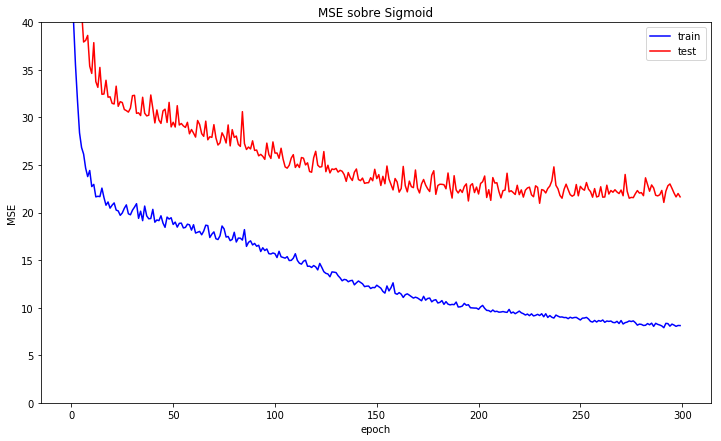

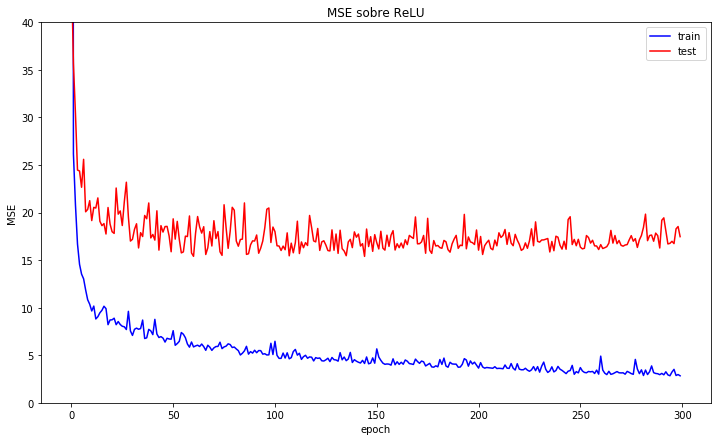

In [35]:
model_orig = Sequential()
model_orig.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_orig.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model_orig.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model_orig.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'],'r-')
plt.title('MSE sobre Sigmoid')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.ylim(0,40)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

model_orig = Sequential()
model_orig.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_orig.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model_orig.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model_orig.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'],'r-')
plt.title('MSE sobre ReLU')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.ylim(0,40)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Regularizando ambas capas

#### Sigmoidal y ReLU con regularizador L_1

/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
  


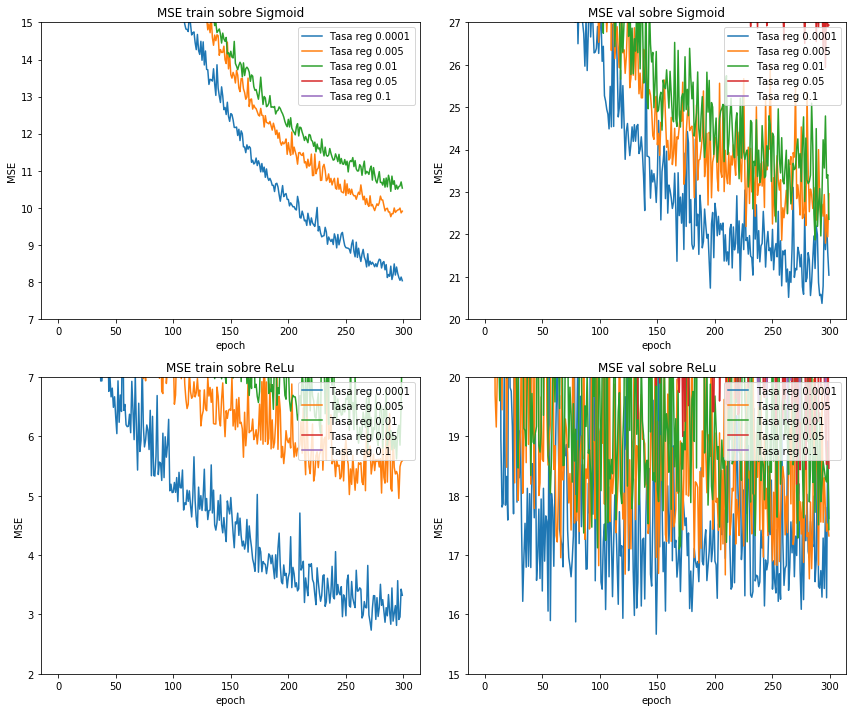

In [40]:
from keras.regularizers import *
import numpy as np
n_lr = 5
#reguls = np.linspace(0.0001,0.001,n_lr)
reguls=[0.0001,0.005,0.01,0.05,0.1]
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                        W_regularizer=l1(r),activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                        W_regularizer=l1(r))) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg '+str(np.round(r,5)))
        B[i,1].plot(val_loss,label='Tasa reg '+str(np.round(r,5)))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(7,15)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(20,27)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(2,7)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(15,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

Aplicando una regularización L1 en ambas capas del modelo, se logra apreciar que aquellos regularizadores más bajos, del orden 10⁻5 y 10^⁻4 (líneas azul, naranja y verde), logran valores de Loss bastante pequeños, los cuales permiten igualmente tener un mejor desempeño sobre el conjunto de pruebas que omitiendo la aplicación de un regularizador L1. Esto se aprecia sólo para el modelo bajo función ReLu puesto que sigmoid, no parece sacar provecho de dicho regularizador obteniendo iguales resultados.  
No así, para aquellos regularizadores mayores a 0.0001, se tiene que la aplicación de dichas tasas no obtiene resultados de interés puesto que no mejora el desempeño respecto a aquel modelo que no hace uso de éstos.

#### Sigmoidal y ReLU con regularizador L_2

/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


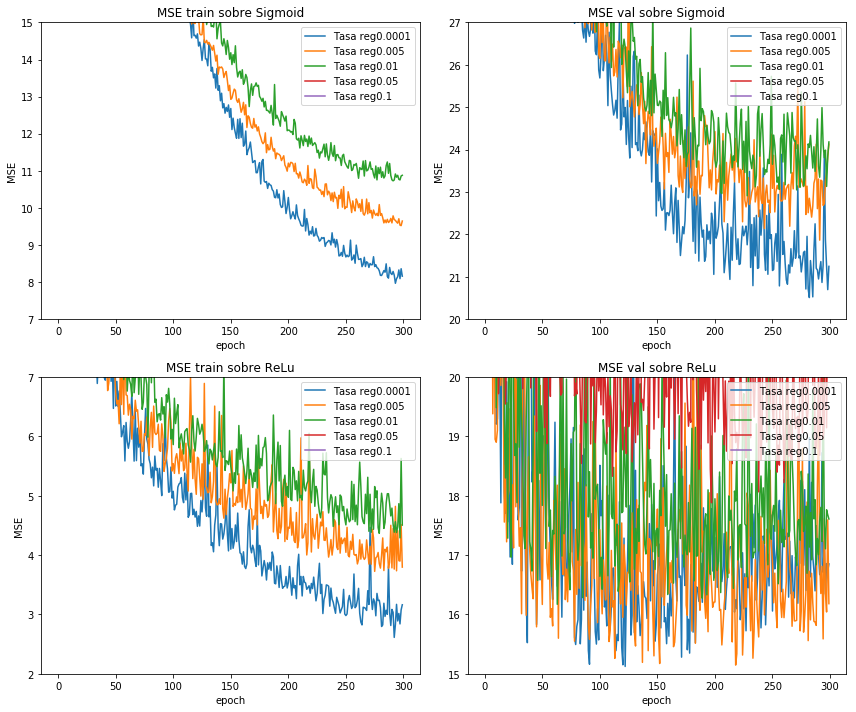

In [42]:
from keras.regularizers import *
n_lr = 5
#reguls = np.linspace(0.0001,0.001,n_lr)
reguls=[0.0001,0.005,0.01,0.05,0.1]
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                        W_regularizer=l2(r),activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                        W_regularizer=l2(r))) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(np.round(r,5)))
        B[i,1].plot(val_loss,label='Tasa reg'+str(np.round(r,5)))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(7,15)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(20,27)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(2,7)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(15,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')


A.tight_layout()
plt.show()

Aplicando un regularizador L_2 en ambs capas del modelo, se aprecia que los resultados obtenidos no reflejan ninguna mejora significativa respecto al modelo original en el que omitió la aplicación de regularizadores L_1 y L_2.

#### Regularizando sólo capa 1 con  L_1

/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':


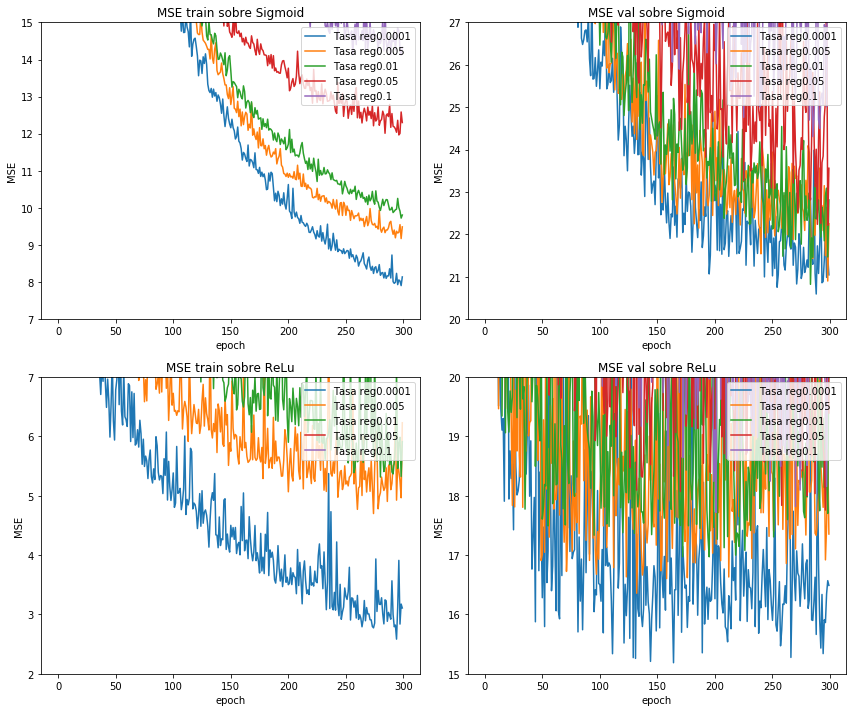

In [47]:
n_lr = 5
#reguls = np.linspace(0.0001,0.001,n_lr)
reguls=[0.0001,0.005,0.01,0.05,0.1]
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                        W_regularizer=l1(r),activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(np.round(r,5)))
        B[i,1].plot(val_loss,label='Tasa reg'+str(np.round(r,5)))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(7,15)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(20,27)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(2,7)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(15,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

Regularizando sólo sobre la capa 1 (L_1), se aprecia una leve mejora sobre el conjunto de pruebas para el modelo que hace uso de la función de activación ReLU. Así, se logran valores para Loss menores que omitiendo la aplicación de regularizadores (modelo original). Esto, sólo para aquellos regularizadores del orden 10⁻5 y 10⁻4. Tal como ya se comentó.   

Aún así, debe tomarse en cuenta la alta varianza de los resultados.

#### Regularizando sólo capa 2 (L_1) 

/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


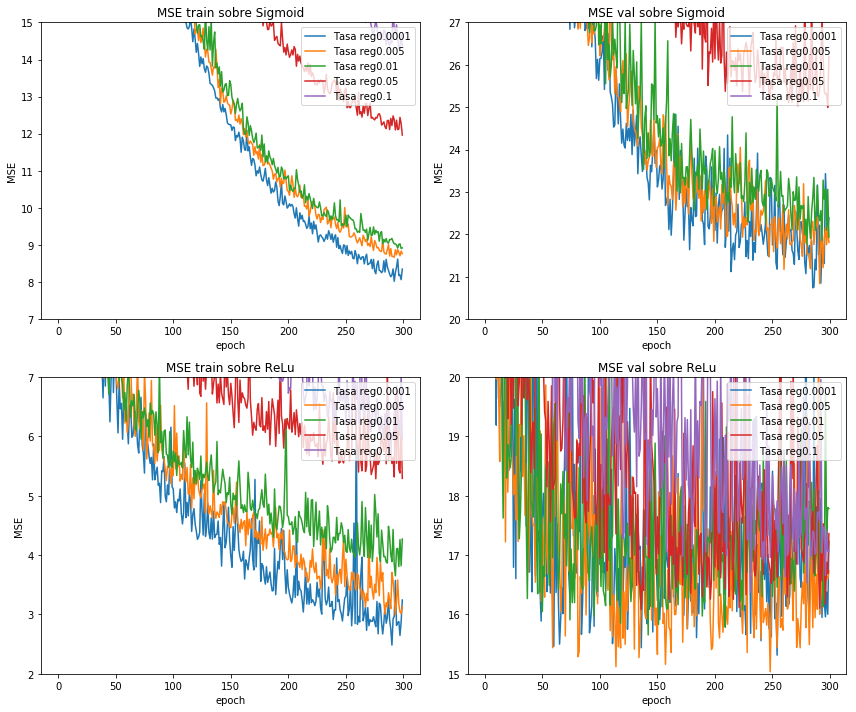

In [48]:
n_lr = 5
#reguls = np.linspace(0.0001,0.001,n_lr)
reguls=[0.0001,0.005,0.01,0.05,0.1]
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                        W_regularizer=l1(r))) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(np.round(r,5)))
        B[i,1].plot(val_loss,label='Tasa reg'+str(np.round(r,5)))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(7,15)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(20,27)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(2,7)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(15,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')


A.tight_layout()
plt.show()

Nuevamente, la aplicación de un regularizador parece no ser significativa. Sólo se aprecia una muy leve mejora para el caso de tasa 1e-5, puesto que en ReLU se evidencia que la línea correspondiente (azul) tiene mejores resultados que el resto de tasas y/o el modelo original.   
Nuevamente no debe caerse en omisión de la alta varianza presente en los resultados. 

#### Regularizando sólo capa 1 con L_2


/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=14, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':


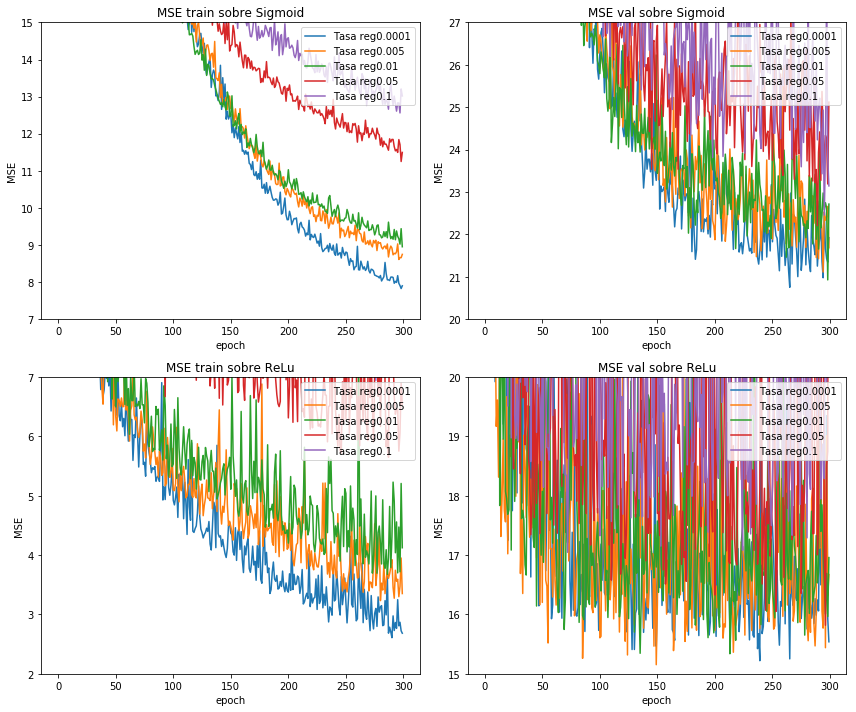

In [49]:
n_lr = 5
#reguls = np.linspace(0.0001,0.001,n_lr)
reguls=[0.0001,0.005,0.01,0.05,0.1]
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                        W_regularizer=l2(r),activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(np.round(r,5)))
        B[i,1].plot(val_loss,label='Tasa reg'+str(np.round(r,5)))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(7,15)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(20,27)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(2,7)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(15,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')


A.tight_layout()
plt.show()

Esta vez, sobre ReLU, parece obtenerse mejores resultados de Loss en el conjunto de pruebas que omitiendo el uso de regularizadores. Los resultados se aproximan a Loss 0.1, mientras que el modelo original fluctuaba alrededor de 0.18 en el epoch 100.  
Aún así, la alta varianza de los resultados deja mucho que desear, puesto que existe una incertidumbre considerable. Sin embargo, esto pudo deberse a la tasa de aprendizaje con la cual se entrenó el modelo. 

#### Regularizando sólo capa 2 con L_2

/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


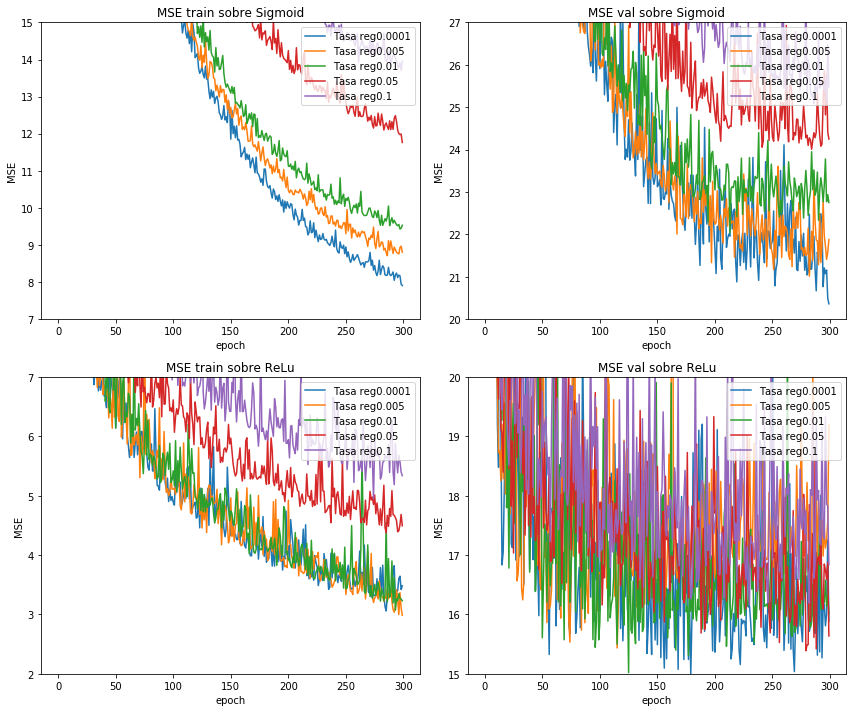

In [50]:
n_lr = 5
#reguls = np.linspace(0.0001,0.001,n_lr)
reguls=[0.0001,0.005,0.01,0.05,0.1]
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(12,10))
i=0

for a in activacion:  
    for r in reguls:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                        W_regularizer=l2(r))) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #0.012
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa reg'+str(np.round(r,5)))
        B[i,1].plot(val_loss,label='Tasa reg'+str(np.round(r,5)))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(7,15)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(20,27)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(2,7)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(15,20)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')


A.tight_layout()
plt.show()

Nuevamente se observa lo comentado en la celda anterior. Parecen obtenerse mejores resultados con regularizaciones del orden 10^⁻5 y 10^-4 (en ReLU) pero existe una alta varianza.  


Así, podemos concluir que la aplicación de regularizadores L_1 y/o L_2 no logran mejorar los resultados obtenidos en un modelo sin regularizadores de este tipo. Todo esto, debido a que dichas penalizaciones se valen de la eliminación de información de los atributos, lo que, para este caso resulta ser perjudicial.

#### i) Entrene los modelos obtenidos en b) y c) utilizando *Dropout*. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.
```python
from keras.layers import Dropout
model = Sequential()
...
model.add(Dropout(0.2))
...
```


### Desempeño sin Dropout

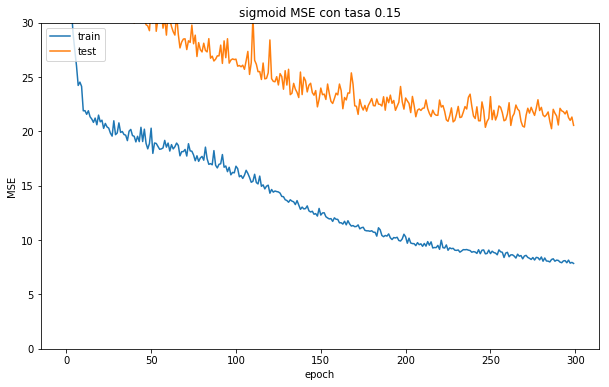

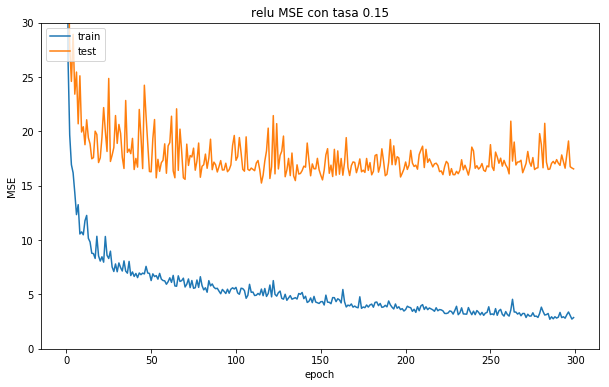

In [54]:
activacion=["sigmoid","relu"]
for a in activacion:    
        plt.figure(figsize=(10,6))
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=(SGD(lr=0.01)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))        
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        plt.plot(loss)
        plt.plot(val_loss)
        plt.title(a+' MSE con tasa 0.15')
        plt.ylabel('MSE')
        plt.ylim(0,30)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

### Desempeño con Dropout

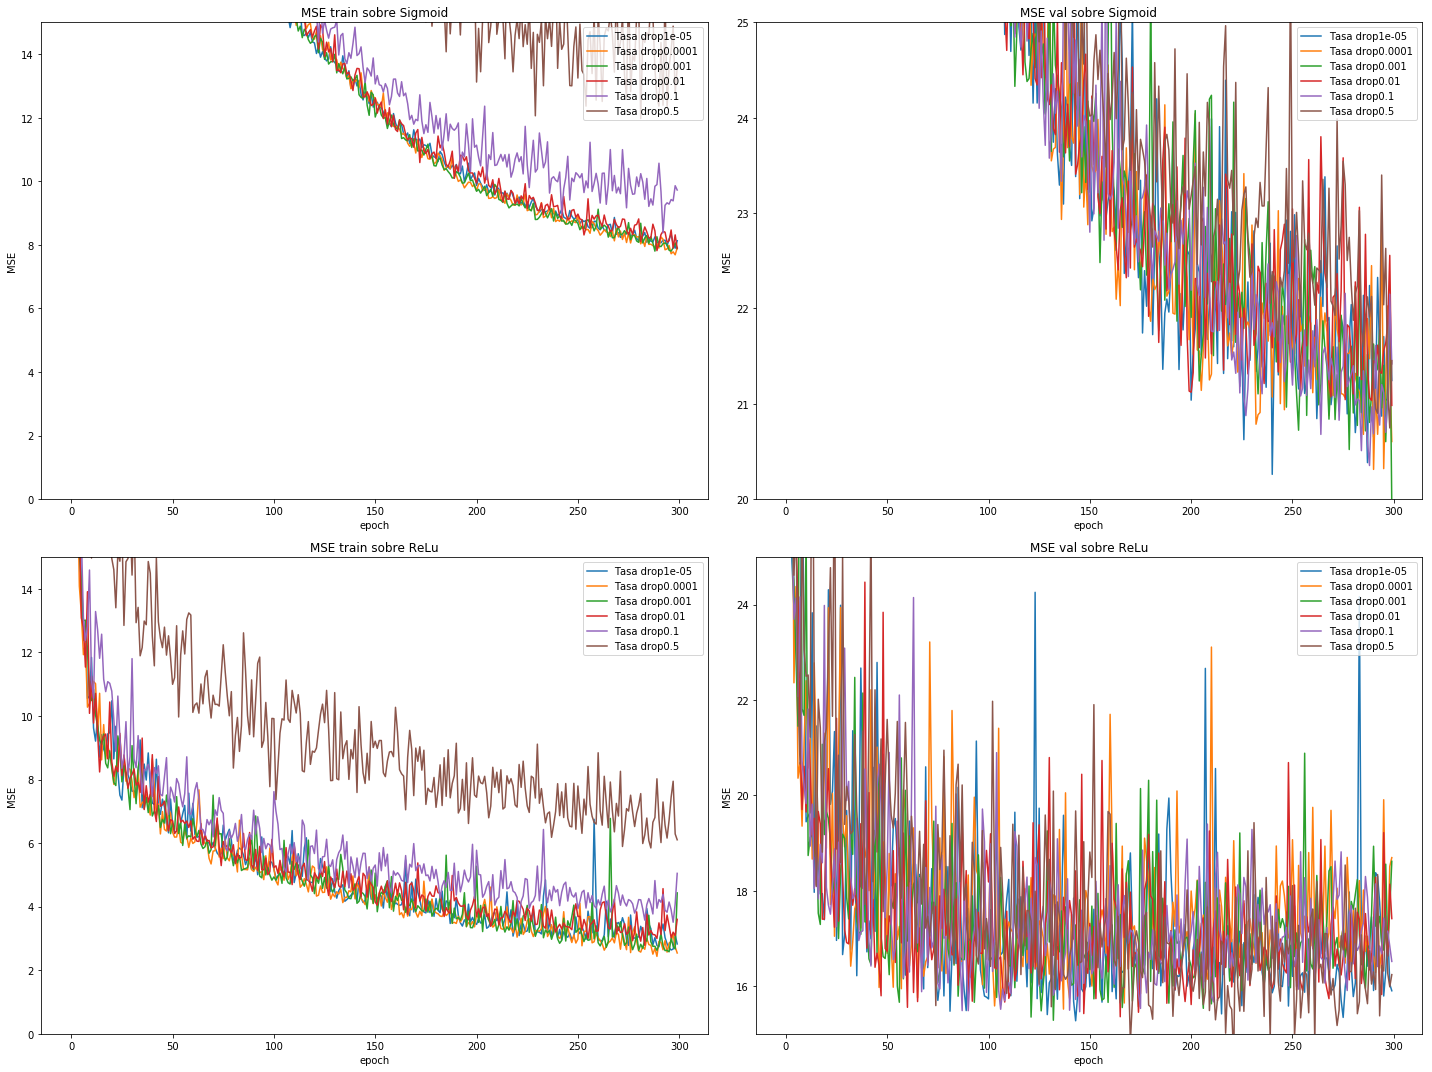

In [56]:
from keras.layers import Dropout
drops=[0.00001,0.0001,0.001,0.01,0.1,0.5]
activacion=["sigmoid","relu"]
A,B=plt.subplots(2,2,figsize=(20,15))
i=0
for a in activacion:  
    for r in drops:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dropout(r))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') 
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        B[i,0].plot(loss,label='Tasa drop'+str(r))
        B[i,1].plot(val_loss,label='Tasa drop'+str(r))
    i+=1

B[0,0].legend(loc='upper right')
B[0,0].set_title('MSE train sobre Sigmoid')
B[0,0].set_ylim(0,15)
B[0,0].set_ylabel('MSE')
B[0,0].set_xlabel('epoch')

B[0,1].legend(loc='upper right')
B[0,1].set_title('MSE val sobre Sigmoid')
B[0,1].set_ylim(20,25)
B[0,1].set_ylabel('MSE')
B[0,1].set_xlabel('epoch')

B[1,0].legend(loc='upper right')
B[1,0].set_title('MSE train sobre ReLu')
B[1,0].set_ylim(0,15)
B[1,0].set_ylabel('MSE')
B[1,0].set_xlabel('epoch')

B[1,1].legend(loc='upper right')
B[1,1].set_title('MSE val sobre ReLu')
B[1,1].set_ylim(15,25)
B[1,1].set_ylabel('MSE')
B[1,1].set_xlabel('epoch')

A.tight_layout()
plt.show()

Analizando el efecto que tiene la aplicación del regularizador Dropout en diferentes tasas. Este tiene por objetivo, apagar una cierta cantidad de neuronas, es decir, tornarles salida 0.  
Así, es posible notar que:

- Para la arquitectura Sigmoid, el uso de un Dropout demasiado bajo (orden 10^-5), tiene efectos negativos en el desempeño del modelo. Es decir, se obtienen valores de Loss mucho más altos que sin la aplicación del regularizador (modelo original), tanto en el entrenamiento como en el testing.

- Para la arquitectura ReLU, no es posible notar ninguna mejora (en ninguna de las tasas puestas a prueba). Es más, el modelo parece verse afectado negativamente alcanzando mayores erorres. Además se aprecia la alta variabilidad de los resultados indicando una gran incertidumbre en ellos. Este comportamiento puede explicarse comentando que de por si la ReLU introduce esparcidad en el modelo (gran cantidad de 0), por lo que agregar dropout no pareciera tener efecto.

Si dropout es muy pequeño, entonces los comportamientos son parecidos a no haberlo aplicado, por otro lado si dropout es muy grande, se le quita mucha información al modelo, por lo que empieza a comportarse de mala manera, se concluye de esto que es muy difícil encontrar un valor perfecto de dropout y que de no sintonizarse bien su parametro puede afectar mucho o nada al modelo final.

#### j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.
```python
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = #model with hiperparam
    # Compile model
    model.compile(optimizer=,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], epochs=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
```

In [57]:
from sklearn import cross_validation
Xm = X_train_scaled.copy()
ym = y_train.copy()
activacion=["sigmoid","relu"]
#Ks=[5,10]
lear_rate_sig = np.linspace(0.0001,0.019,n_lr)


In [58]:

for r in lear_rate_sig:  #se plica tanto para sigmoidal como para ReLU
    for a in activacion: #sigmoidal y relu        
        kfold = cross_validation.KFold(len(Xm), 5)
        cvscores = []
        for i, (train, val) in enumerate(kfold):
            model = Sequential()
            model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
            model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
            model.compile(optimizer=SGD(lr=r),loss='mean_squared_error')
            
            model.fit(Xm.values[train], ym[train], epochs=300,verbose=0)
            # evaluate the model
            scores = model.evaluate(Xm.values[val], ym[val])
            cvscores.append(scores)
        mse_cv = np.mean(cvscores)
        print ("Loss promedio de CV "+str(5)+" bajo learning rate",r,"y activacion",a,":",mse_cv)

75/75 [==============================] - 2s 27ms/step
Loss promedio de CV 5 bajo learning rate 0.0001 y activacion sigmoid : 35.35005762548614
75/75 [==============================] - 2s 27ms/step
Loss promedio de CV 5 bajo learning rate 0.0001 y activacion relu : 19.562201344406397
75/75 [==============================] - 2s 27ms/step
Loss promedio de CV 5 bajo learning rate 0.004825 y activacion sigmoid : 17.649682532862617
75/75 [==============================] - 2s 28ms/step
Loss promedio de CV 5 bajo learning rate 0.004825 y activacion relu : 13.928968163406642
75/75 [==============================] - 2s 30ms/step
Loss promedio de CV 5 bajo learning rate 0.00955 y activacion sigmoid : 14.494954175045615
75/75 [==============================] - 2s 28ms/step
Loss promedio de CV 5 bajo learning rate 0.00955 y activacion relu : 12.304692252711245
75/75 [==============================] - 2s 28ms/step
Loss promedio de CV 5 bajo learning rate 0.014275 y activacion sigmoid : 15.7376950080

Configurando los parámetros de las pregunta B y C y haciendo uso del proceso de Cross Validation (el cual tiene por objeto estimar el error de validación a fin de no reducir la cantidad de ejemplos presentes en el conjunto de entrenamiento al dividirlo en training set/validation set), se aprecia que aquella tasa de aprendizaje que acusa e menor error (Loss) en 5 subdivisiones del conjunto de entrenamiento, es **0.019**  para el caso de activacion sigmoid con Loss promedio **13.00812**. Mientras que para ReLU, la tasa resultó ser **0.00955** con Loss de **12.30469**

In [59]:
for r in lear_rate_sig:
    for a in activacion: #sigmoidal y relu        
        kfold = cross_validation.KFold(len(Xm), 10)
        cvscores = []
        for i, (train, val) in enumerate(kfold):
            model = Sequential()
            model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
            model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
            model.compile(optimizer=SGD(lr=r),loss='mean_squared_error')
            
            model.fit(Xm.values[train], ym[train], epochs=300,verbose=0)
            # evaluate the model
            scores = model.evaluate(Xm.values[val], ym[val])
            cvscores.append(scores)
        mse_cv = np.mean(cvscores)
        print ("Loss promedio de CV "+str(10)+" bajo learning rate",r,"y activacion",a,":",mse_cv)

37/37 [==============================] - 2s 67ms/step
Loss promedio de CV 10 bajo learning rate 0.0001 y activacion sigmoid : 34.1885048676351
37/37 [==============================] - 2s 63ms/step
Loss promedio de CV 10 bajo learning rate 0.0001 y activacion relu : 19.37986947339595
37/37 [==============================] - 2s 65ms/step
Loss promedio de CV 10 bajo learning rate 0.004825 y activacion sigmoid : 16.76990540817825
37/37 [==============================] - 2s 67ms/step
Loss promedio de CV 10 bajo learning rate 0.004825 y activacion relu : 11.722989940507652
37/37 [==============================] - 2s 66ms/step
Loss promedio de CV 10 bajo learning rate 0.00955 y activacion sigmoid : 13.958336274756139
37/37 [==============================] - 3s 69ms/step
Loss promedio de CV 10 bajo learning rate 0.00955 y activacion relu : 13.0462339328753
37/37 [==============================] - 3s 69ms/step
Loss promedio de CV 10 bajo learning rate 0.014275 y activacion sigmoid : 15.36714103

Ahora bien, se procedió con el mismo método pero aumentando el número de subdivisiones de 5 a **10**, con lo cual se obtuvo: 

- **Sigmoid**: Learning rate óptima **0.00955** con Loss **13.95833**
- **ReLU**: Learning rate óptima **0.004825** con Loss **11.72299**

Con lo que resulta evidente que ReLU trabaja de mejor manera con tasas de aprendizaje bastante pequeñas.


Así entonces, parece ser que la configuración de los parámetros y hiperparámetros de los modelos aquí estudiados es bastante sensible y dependerá en gran medida del problema que se desee atacar y de la arquitectura de la red neuronal artificial a utilizar. Por esto es que se cuenta con una amplia gama de regularizadores, los cuales deberán ser aplicados estratégicamente luego de analizar a fondo el problema.